# UA Innovate
### The goal of this project is to infrom business decisions that can reduce the cost for companies returning to the office
### In order to accomplish this goal we will explore our dataset and build our analysis based off of data sets provided to us
### that conatin location, weather other qunatative data on the attributes of buildings

In [309]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import os
import stat
import statsmodels.api as sm
# Plots
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore", category=FutureWarning)

### We start by loading in our training and testing data, analytics will be done on the trainining data because of
### the EUI Scores that it contains

In [310]:
data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

### From there we will begin cleaning our data to start we will reset the index and getting rid of any duplicates

In [311]:
data.set_index('id', inplace=True)
data.drop_duplicates(inplace=True)

### After loading in and getting rid of douplicates we see that we are left with 63 variables and 75,718 data entries
### each of those enteries repersents a building and the varibles are attributes of that building

In [312]:
data.shape

(75718, 63)

### From here we can begin assessing the health of our data starting with checking data availability

### We beign by checking which varible contain any missing data NaN

In [313]:
variables_w_na = [col for col in data.columns if data[col].isnull().any()]
print(variables_w_na)

['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


### From here we can create show the total count of NaN values as well as the percentage of the values that are NaN for each 
### column

In [314]:
nan_table = data.isnull().sum(axis=0).rename('NaN Count').to_frame()
nan_table['Percentage NaN'] = nan_table['NaN Count']/data.shape[0]
nan_table = nan_table[nan_table['NaN Count'] > 0]
nan_table


,NaN Count,Percentage NaN
year_built,1817,0.023997
energy_star_rating,26682,0.352386
direction_max_wind_speed,41070,0.542407
direction_peak_wind_speed,41798,0.552022
max_wind_speed,41070,0.542407
days_with_fog,45783,0.604651


### We can see that several catagories have large gaps in data so we should refrain from using them further expecailly those with greater
### then 50% of the data missing

### From here we can being exporing our data to find out what is catagorial and what is quantative we can start by finding the dtype of all the columns

In [315]:
col_list = data.columns
for col in col_list:
    print(col + " : ", end="")
    print(data[col].dtype)

Year_Factor : int64
State_Factor : object
building_class : object
facility_type : object
floor_area : float64
year_built : float64
energy_star_rating : float64
ELEVATION : float64
january_min_temp : int64
january_avg_temp : float64
january_max_temp : int64
february_min_temp : int64
february_avg_temp : float64
february_max_temp : int64
march_min_temp : int64
march_avg_temp : float64
march_max_temp : int64
april_min_temp : int64
april_avg_temp : float64
april_max_temp : int64
may_min_temp : int64
may_avg_temp : float64
may_max_temp : int64
june_min_temp : int64
june_avg_temp : float64
june_max_temp : int64
july_min_temp : int64
july_avg_temp : float64
july_max_temp : int64
august_min_temp : int64
august_avg_temp : float64
august_max_temp : int64
september_min_temp : int64
september_avg_temp : float64
september_max_temp : int64
october_min_temp : int64
october_avg_temp : float64
october_max_temp : int64
november_min_temp : int64
november_avg_temp : float64
november_max_temp : int64
decemb

In [316]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


### Based on the data types and a look at the dataframe it is clear that State_Facto, building_class, and facility_type is all catagorical data
### We dive into Year_Factor as well becasue of the naming convention similar to State_Factor

In [317]:
data['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6])

### It apears that Year_Factor is a catagoical variable that seems to repersents buckets of ages of buildings
### In order to test this theory we can make a histogram of the year_built after dropping the NaN and compaire it to 
### Year_Factor

Text(0, 0.5, 'Count')

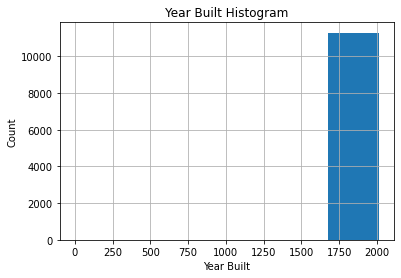

In [318]:
data.dropna()['year_built'].hist(bins=6)
plt.title("Year Built Histogram")
plt.xlabel('Year Built')
plt.ylabel('Count')

### Here we see that there is an issue with some of the data. The chart should not start at 0 lets explore this further by checking the min year

In [319]:
data.dropna()['year_built'].min()

0.0

### The min value should not be 0 it is likley that 0 was put instead of NaN in come cases in the data, in ordr to clearn that up we can add a filter

In [320]:
data.dropna()['year_built'][data['year_built'] > 0].min()

1600.0

### This is a much more likely starting point so from now on we will filter out year 0 from our data

Text(0, 0.5, 'Count')

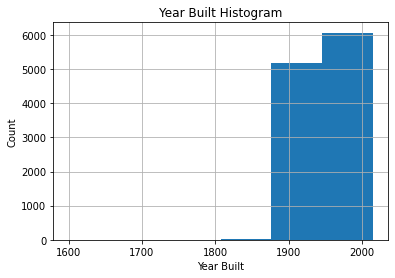

In [321]:
data.dropna()['year_built'][data['year_built'] > 0].hist(bins=6)
plt.title("Year Built Histogram")
plt.xlabel('Year Built')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

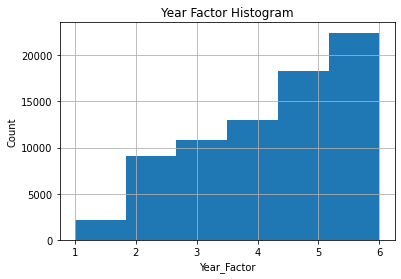

In [322]:
data['Year_Factor'].hist(bins=6)
plt.title("Year Factor Histogram")
plt.xlabel('Year_Factor')
plt.ylabel('Count')

### Bases on the compairson between these charts we assume that Year_Factor is groups of year where lower numbers represent groups of older year and higher numbers represent more recent years

### We are also assuming that the state numbers under State_Factor repersent differnt states that the buildings are located in


### Now that we have defined the four catagorical data variables lets explore these a little further

In [323]:
State_Count = data['State_Factor'].value_counts().to_frame(name="State Count")
State_Count

,State Count
State_6,50807
State_11,6412
State_1,5613
State_2,4870
State_4,4300
State_8,3701
State_10,15


Text(0, 0.5, 'Count')

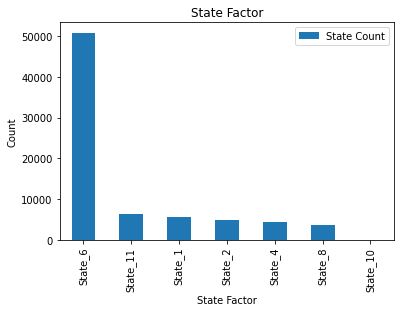

In [324]:
State_Count.plot(kind='bar')
plt.title("State Factor")
plt.xlabel('State Factor')
plt.ylabel('Count')

### Based off this bar chart we can see that all of the states hold a relativly similar count of buildings with the exception of State_10 that has vastly fewer and State_6 that has vastly more.

In [325]:
building_Count = data['building_class'].value_counts().to_frame(name="building Count")
building_Count

,building Count
Residential,43533
Commercial,32185


Text(0, 0.5, 'Count')

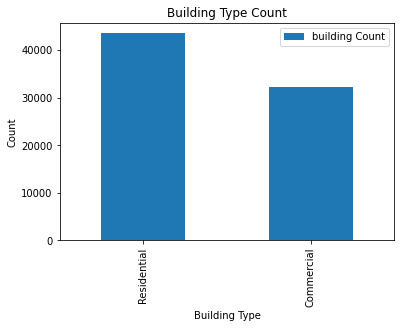

In [326]:
building_Count.plot(kind='bar')
plt.title("Building Type Count")
plt.xlabel('Building Type')
plt.ylabel('Count')

### Based off of this we can see that our data set contains snigificaly more Residential then Comercial Buildings

In [327]:
facility_type_Count = data['facility_type'].value_counts().to_frame(name="facility_type")
facility_type_Count

,facility_type
Multifamily_Uncategorized,39430
Office_Uncategorized,12508
Education_Other_classroom,3860
Lodging_Hotel,2098
2to4_Unit_Building,1893
Commercial_Other,1744
5plus_Unit_Building,1273
Warehouse_Nonrefrigerated,1255
Retail_Uncategorized,1130
Education_College_or_university,1053


Text(0, 0.5, 'Count')

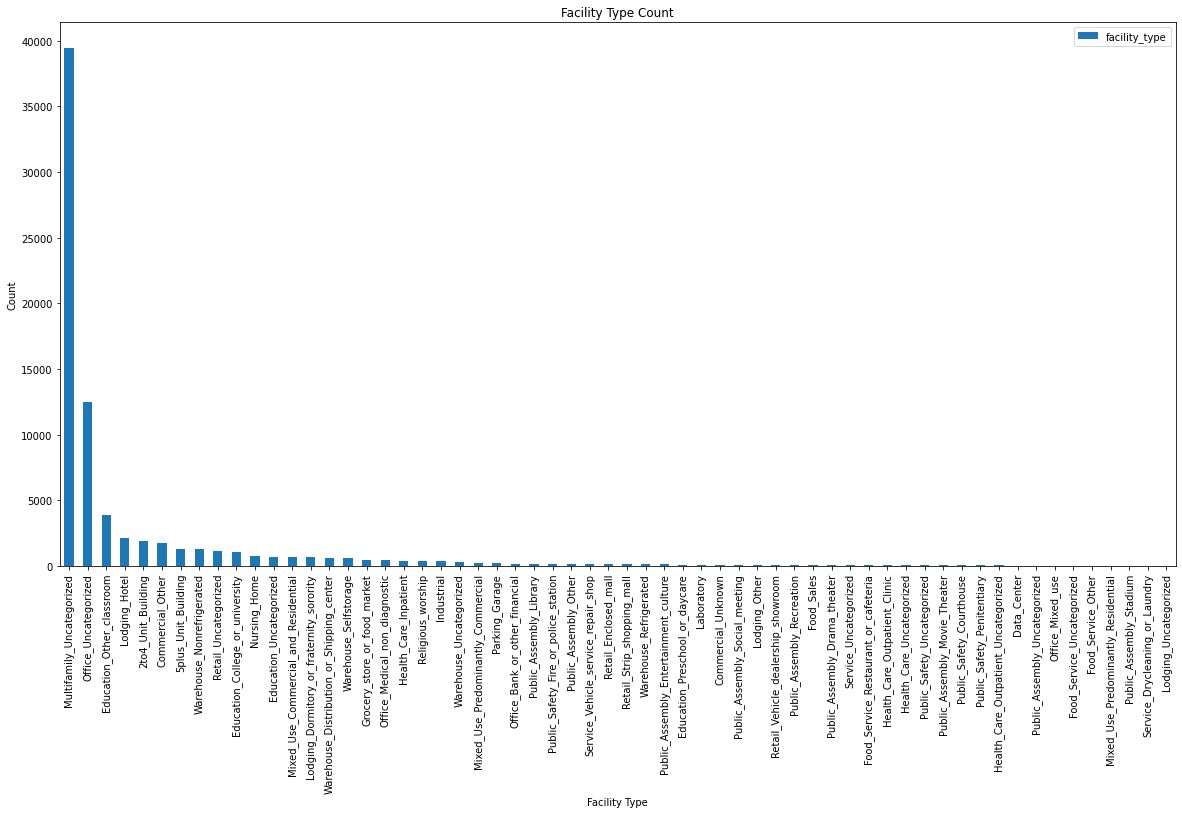

In [333]:

facility_type_Count.plot(kind='bar', figsize=(20,10))
plt.title("Facility Type Count")
plt.xlabel('Facility Type')
plt.ylabel('Count')

### based off of this you can see our larges catagory by a vast majority is Multifamily_Uncatagorized